# Popular Data Science Questions

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science!

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

The Stack Exchange websites can be sorted by percentage of questions that received answers. At the time of this writing, [Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) is on the bottom 10 sites with respect to this metric.

DSSE will be the focus of this guided project.

## Stack Exchange

On DSSE's help center's section on questions , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

## Getting the data

To get the relevant data we run the following query:

SELECT Id, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount  
  FROM posts  
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 
Here's what the first few rows look like:

| Id    | PostTypeId | CreationDate        | Score | ViewCount | Tags                                                              | AnswerCount | FavoriteCount |
|-------|------------|---------------------|-------|-----------|-------------------------------------------------------------------|-------------|---------------|
| 44419 | 1          | 2019-01-23 09:21:13 | 1     | 21        | &lt;machine-learning&gt;&lt;data-mining&gt;                                   | 0           |               |
| 44420 | 1          | 2019-01-23 09:34:01 | 0     | 25        | &lt;machine-learning&gt;&lt;regression&gt;&lt;linear-regression&gt;&lt;regularization&gt; | 0           |               |
| 44423 | 1          | 2019-01-23 09:58:41 | 2     | 1651      | &lt;python&gt;&lt;time-series&gt;&lt;forecast&gt;&lt;forecasting&gt;                      | 0           |               |
| 44427 | 1          | 2019-01-23 10:57:09 | 0     | 55        | &lt;machine-learning&gt;&lt;scikit-learn&gt;&lt;pca&gt;                             | 1           |               |
| 44428 | 1          | 2019-01-23 11:02:15 | 0     | 19        | &lt;dataset&gt;&lt;bigdata&gt;&lt;data&gt;&lt;speech-to-text&gt;                          | 0           |               |

## Exploring the data

The result of the query was stored in a file called "2019_questions.csv".

In [1]:
import pandas as pd
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
print(questions.head())

      Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    <machine-learning><data-mining>            0   
1  <machine-learning><regression><linear-regressi...            0   
2       <python><time-series><forecast><forecasting>            0   
3              <machine-learning><scikit-learn><pca>            1   
4           <dataset><bigdata><data><speech-to-text>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [3]:
questions.describe(include="all")

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
count,8839.000000,8839,8839.000000,8839.000000,8839,8839.000000,1407.000000
unique,NaN,8838,NaN,NaN,6462,NaN,NaN
top,NaN,2019-09-25 18:32:47,NaN,NaN,<machine-learning>,NaN,NaN
freq,NaN,2,NaN,NaN,118,NaN,NaN
first,NaN,2019-01-01 03:53:02,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 20:18:32,NaN,NaN,NaN,NaN,NaN
mean,54724.172870,NaN,0.870687,171.548026,NaN,0.787985,1.184790
std,6507.618509,NaN,1.410255,772.813626,NaN,0.851146,0.982766
min,43363.000000,NaN,-2.000000,2.000000,NaN,0.000000,0.000000
25%,48917.500000,NaN,0.000000,22.000000,NaN,0.000000,1.000000


In [4]:
print(questions.index.size)

8839


The only column with missing values is FavoriteCount.
I think we could turn the NaNs in 0

In [5]:
print(questions.dtypes)

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object


The types are correct, maybe we can turn FavoriteCount into Int.  
For the Tags column we can create a list for each entry, each describing one tag. 

## Cleaning the Data

In [6]:
questions["FavoriteCount"]=questions["FavoriteCount"].fillna(0).astype(int)
print(questions.dtypes)

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object


In [7]:
questions["Tags"]=questions["Tags"].str.replace("><",",")
questions["Tags"]=questions["Tags"].str.replace("[><]","")
print(questions["Tags"].head())

0                         machine-learning,data-mining
1    machine-learning,regression,linear-regression,...
2              python,time-series,forecast,forecasting
3                    machine-learning,scikit-learn,pca
4                  dataset,bigdata,data,speech-to-text
Name: Tags, dtype: object


In [8]:
questions["Tags"]=questions["Tags"].str.split(",")
print(questions["Tags"].head())

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object


In [9]:
list_of_tags=[]
def tag_list(li):
    for t in li:
        if t not in list_of_tags:
            list_of_tags.append(t)
for l in questions["Tags"]:
    tag_list(l)

print(list_of_tags)

['machine-learning', 'data-mining', 'regression', 'linear-regression', 'regularization', 'python', 'time-series', 'forecast', 'forecasting', 'scikit-learn', 'pca', 'dataset', 'bigdata', 'data', 'speech-to-text', 'fuzzy-logic', 'anomaly-detection', 'online-learning', 'matrix-factorisation', 'correlation', 'naive-bayes-classifier', 'deep-learning', 'keras', 'cnn', 'theory', 'gradient-descent', 'nlp', 'clustering', 'feature-extraction', 'encoding', 'embeddings', 'pandas', 'numpy', 'decision-trees', 'accuracy', 'matlab', 'reinforcement-learning', 'q-learning', 'policy-gradients', 'neural-network', 'image-classification', 'r', 'logistic-regression', 'predictive-modeling', 'lstm', 'tensorflow', 'gpu', 'data-cleaning', 'object-detection', 'recommender-system', 'supervised-learning', 'similarity', 'text-mining', 'word-embeddings', 'machine-learning-model', 'xgboost', 'apache-spark', 'classification', 'gaussian', 'deepmind', 'training', 'statistics', 'nlg', 'overfitting', 'inception', 'rnn', 't

In [10]:
print(len(list_of_tags))

526


In [11]:
tags_info=pd.DataFrame(list_of_tags)
print(tags_info.head())

                   0
0   machine-learning
1        data-mining
2         regression
3  linear-regression
4     regularization


In [12]:
tags_info.rename(columns={0:"Tags"}, inplace=True)
print(tags_info.head())

                Tags
0   machine-learning
1        data-mining
2         regression
3  linear-regression
4     regularization


## Most Used and Most Viewed

I now focus on determining the most popular tags. I'll consider two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [13]:
def count_used(t):
    count=0
    for li in questions["Tags"]:
        if t in li:
            count+=1
    return count
tags_info["Used"]=tags_info["Tags"].apply(count_used)
print(tags_info.head())

                Tags  Used
0   machine-learning  2693
1        data-mining   217
2         regression   347
3  linear-regression   175
4     regularization    50


In [14]:
def count_viewed(t):
    count=0
    for row in questions.itertuples(index=False):
        if t in row[4]:
            count+=row[3]
    return count
tags_info["Viewed"]=tags_info["Tags"].apply(count_viewed)
print(tags_info.head())

                Tags  Used  Viewed
0   machine-learning  2693  388499
1        data-mining   217   31056
2         regression   347   49451
3  linear-regression   175   18978
4     regularization    50    4941


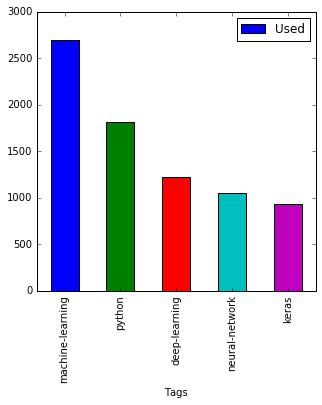

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
tags_info_ord=tags_info.sort_values("Used", ascending=False)
tags_info_ord.head().plot.bar(x="Tags", y="Used", figsize=(5,5))

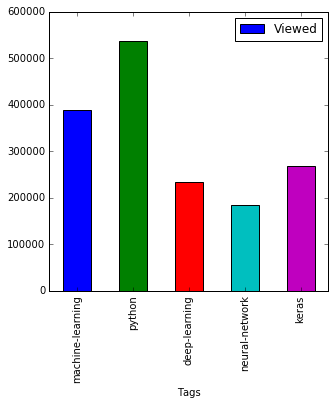

In [16]:
tags_info_ord.head().plot.bar(x="Tags", y="Viewed", figsize=(5,5))

## Relation Between Tags

In [17]:
questions_copy=questions.copy()
def many_tags(li):
    return len(li)
questions_copy["N_Tags"]=questions_copy["Tags"].apply(many_tags)
questions_2tags=questions_copy[questions_copy["N_Tags"]>=2]
print(questions_2tags.head())
print(questions_2tags.index.size)

      Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    [machine-learning, data-mining]            0   
1  [machine-learning, regression, linear-regressi...            0   
2       [python, time-series, forecast, forecasting]            0   
3              [machine-learning, scikit-learn, pca]            1   
4           [dataset, bigdata, data, speech-to-text]            0   

   FavoriteCount  N_Tags  
0              0       2  
1              0       4  
2              0       4  
3              0       3  
4              0       4  
7713


In [18]:
top_20_tags=tags_info_ord["Tags"].head(20)
print(top_20_tags)

0           machine-learning
5                     python
21             deep-learning
39            neural-network
22                     keras
57            classification
45                tensorflow
9               scikit-learn
26                       nlp
23                       cnn
6                time-series
44                      lstm
31                    pandas
2                 regression
11                   dataset
41                         r
43       predictive-modeling
27                clustering
61                statistics
54    machine-learning-model
Name: Tags, dtype: object


In [19]:
l_top_20_tags=top_20_tags.tolist()
relation_top_20_tags=pd.DataFrame(l_top_20_tags, columns=["Tags"])

In [20]:
print(relation_top_20_tags)

                      Tags
0         machine-learning
1                   python
2            deep-learning
3           neural-network
4                    keras
5           classification
6               tensorflow
7             scikit-learn
8                      nlp
9                      cnn
10             time-series
11                    lstm
12                  pandas
13              regression
14                 dataset
15                       r
16     predictive-modeling
17              clustering
18              statistics
19  machine-learning-model


In [21]:
list_of_lists=questions_2tags["Tags"].tolist()
print(list_of_lists)

[['machine-learning', 'data-mining'], ['machine-learning', 'regression', 'linear-regression', 'regularization'], ['python', 'time-series', 'forecast', 'forecasting'], ['machine-learning', 'scikit-learn', 'pca'], ['dataset', 'bigdata', 'data', 'speech-to-text'], ['time-series', 'anomaly-detection', 'online-learning'], ['correlation', 'naive-bayes-classifier'], ['machine-learning', 'python', 'deep-learning', 'keras', 'cnn'], ['machine-learning', 'theory'], ['machine-learning', 'gradient-descent'], ['nlp', 'clustering', 'feature-extraction', 'encoding', 'embeddings'], ['python', 'scikit-learn', 'pandas', 'numpy'], ['python', 'scikit-learn', 'decision-trees', 'accuracy', 'matlab'], ['python', 'pandas'], ['python', 'deep-learning', 'keras'], ['machine-learning', 'reinforcement-learning', 'q-learning', 'policy-gradients'], ['neural-network', 'deep-learning', 'image-classification'], ['r', 'logistic-regression', 'regularization'], ['machine-learning', 'time-series', 'predictive-modeling', 'ls

In [22]:
for tag in l_top_20_tags:
    lis=[]
    for tag2 in l_top_20_tags:
        count=0
        for tl in list_of_lists:
            if (tag in tl)&(tag2 in tl):
                count+=1
        lis.append(count)
    relation_top_20_tags[tag]=lis
print(relation_top_20_tags)

                      Tags  machine-learning  python  deep-learning  \
0         machine-learning              2575     499            429   
1                   python               499    1759            160   
2            deep-learning               429     160           1191   
3           neural-network               366     137            305   
4                    keras               195     280            247   
5           classification               259      98             59   
6               tensorflow               106     167            136   
7             scikit-learn               188     235             16   
8                      nlp               113      71             72   
9                      cnn               124      62            160   
10             time-series               131     105             44   
11                    lstm                71      61            103   
12                  pandas                62     244              1   
13    

### Every top ten Tag is related with machine-learning!

In [23]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_questions["Tags"]=all_questions["Tags"].str.replace("><",",")
all_questions["Tags"]=all_questions["Tags"].str.replace("[><]","")
print(all_questions.head())

      Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  
0            python,keras,tensorflow,cnn,probability  
1                                     neural-network  
2                          python,ibm-watson,chatbot  
3                                              keras  
4  r,predictive-modeling,machine-learning-model,s...  


## Enter Domain Knowledge

Most of the top tags are all intimately related with one central machine learning theme: deep learning. 

## Is deep learning just a fad?

In [24]:
key_learning=["machine-learning", "python", "deep-learning", "neural-network", "keras", "classification", "tensorflow", "scikit-learn", "lstm", "regression", "dataset", "predictive-modeling", "clustering", "machine-learning-model"]

In [25]:
all_questions["Tags"]=all_questions["Tags"].str.split(",")
print(all_questions["Tags"].head())

0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object


In [26]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False
def deep(ls):
    if common_member(ls, key_learning):
        return 1
    else:
        return 0

all_questions["Deep_learning_or_not"]=all_questions["Tags"].apply(deep)

In [27]:
print(all_questions["Deep_learning_or_not"])

0        1
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       0
21       1
22       1
23       1
24       1
25       0
26       1
27       1
28       1
29       1
        ..
21546    1
21547    1
21548    0
21549    1
21550    1
21551    1
21552    1
21553    1
21554    1
21555    1
21556    0
21557    1
21558    1
21559    1
21560    1
21561    1
21562    1
21563    1
21564    1
21565    1
21566    1
21567    1
21568    0
21569    1
21570    1
21571    0
21572    1
21573    1
21574    1
21575    1
Name: Deep_learning_or_not, Length: 21576, dtype: int64


In [28]:
import datetime as dt
all_questions["Month"] = all_questions['CreationDate'].dt.year*100+all_questions['CreationDate'].dt.month
print(all_questions["Month"].head(10))

0    201902
1    201902
2    201902
3    201902
4    201902
5    201902
6    201902
7    201902
8    201902
9    201902
Name: Month, dtype: int64


In [29]:
monthly_group=all_questions.groupby("Month").size()
monthly_quest=pd.DataFrame(monthly_group)
monthly_quest.rename(columns={0:"total_questions"}, inplace=True)
print(monthly_quest.head(10))

        total_questions
Month                  
201405               58
201406               99
201407               76
201408               65
201409               48
201410               71
201411               64
201412               81
201501               63
201502               73


In [30]:
monthly_group_deep=all_questions[all_questions["Deep_learning_or_not"]==1].groupby("Month").size()
monthly_quest["deep_questions"]=monthly_group_deep
print(monthly_quest.head(10))

        total_questions  deep_questions
Month                                  
201405               58              19
201406               99              51
201407               76              42
201408               65              37
201409               48              33
201410               71              46
201411               64              35
201412               81              54
201501               63              32
201502               73              44


In [31]:
monthly_quest["deep_questions_percentage"]=monthly_quest["deep_questions"]*100/monthly_quest["total_questions"]
print(monthly_quest.head(10))

        total_questions  deep_questions  deep_questions_percentage
Month                                                             
201405               58              19                  32.758621
201406               99              51                  51.515152
201407               76              42                  55.263158
201408               65              37                  56.923077
201409               48              33                  68.750000
201410               71              46                  64.788732
201411               64              35                  54.687500
201412               81              54                  66.666667
201501               63              32                  50.793651
201502               73              44                  60.273973


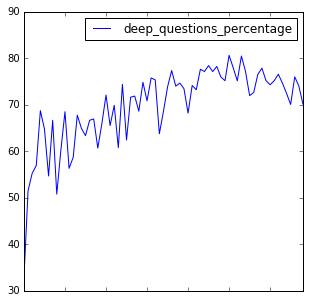

In [32]:
monthly_quest.index=monthly_quest.index.astype(str)
monthly_quest.plot(x=monthly_quest.index.values, y="deep_questions_percentage", sharex=False, figsize=(5,5))

It doesn't seems deep learning is just a fad.
The rate of machine learning questions tends to increase!